# OpenSources

Link: [https://github.com/BigMcLargeHuge/opensources](https://github.com/BigMcLargeHuge/opensources)

This jupyter notebook covers descriptive analysis of **OpenSources** dataset. 

## Attributes

* **site** - site name
* **type** - type of site (bias, ...)
* **2nd type** - second type of site
* **3rd type** - third type of site
* **Source Notes (things to know?)** - some notes

## Setup and import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:
df = pd.read_csv('data/data.csv')

## Analysis

### Count of records

In [4]:
len(df)

833

### Data examples

In [5]:
df.head()

,Unnamed: 0,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
0,100percentfedup.com,bias,NaN,NaN,NaN,NaN
1,365usanews.com,bias,conspiracy,NaN,NaN,NaN
2,4threvolutionarywar.wordpress.com,bias,conspiracy,NaN,NaN,NaN
3,aheadoftheherd.com,bias,NaN,NaN,"false quotes regarding banking, heavily promot...",NaN
4,americablog.com,bias,clickbait,NaN,domain for sale,NaN


### More information about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 6 columns):
Unnamed: 0                        833 non-null object
type                              833 non-null object
2nd type                          369 non-null object
3rd type                          98 non-null object
Source Notes (things to know?)    264 non-null object
Unnamed: 5                        3 non-null object
dtypes: object(6)
memory usage: 39.1+ KB


In [7]:
df.describe(include='all')

,Unnamed: 0,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
count,833,833,369,98,264,3
unique,825,16,18,13,132,2
top,madworldnews.com,fake,bias,bias,http://www.politifact.com/punditfact/article/2...,
freq,3,235,79,20,111,2


### NaN values

Are there any NaN values in our data?

In [8]:
df.isnull().values.any()

True

Let's look at NaN values per each column:

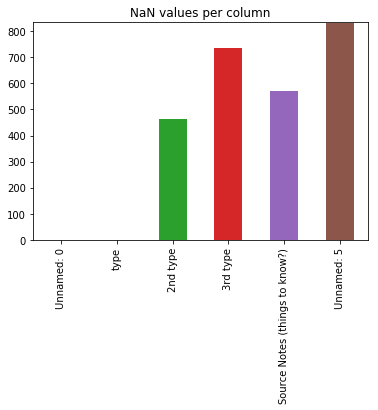

In [9]:
df.isnull().sum().plot(kind='bar', ylim=(0, len(df)), title='NaN values per column')

### Attributes analysis

What is the distribution of fake news labels in our data?

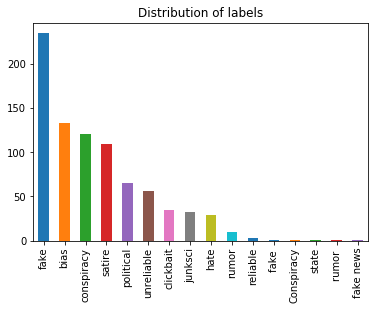

In [11]:
df['type'].value_counts().plot(kind='bar', title='Distribution of labels')